In [9]:
import cv2
from infer_detections import create_detection_df
comp_img_list = ["C:/Mask_detection/abc.jpg"]
frozen_model_path= "C:/Mask_detection/frozen_inference_graph_ssd.pb"
label_map = "C:/Mask_detection/label_map.pbtxt"

In [14]:
df=create_detection_df(comp_img_list,frozen_model_path,label_map,score_thresh=0.5)

['C:/Mask_detection/abc.jpg']
preparing to load the model
frozen model path is C:/Mask_detection/frozen_inference_graph_ssd.pb
Model loaded from disk successfully. Time taken for loading the model is 0.35704493522644043


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.27s/it]


In [15]:
df

,image_path,classes,score,x1,y1,x2,y2
0,C:/Mask_detection/abc.jpg,with_mask,57.588583,1313,1494,2570,2980


In [16]:
import tensorflow as tf
tf.__version__

'1.15.2'

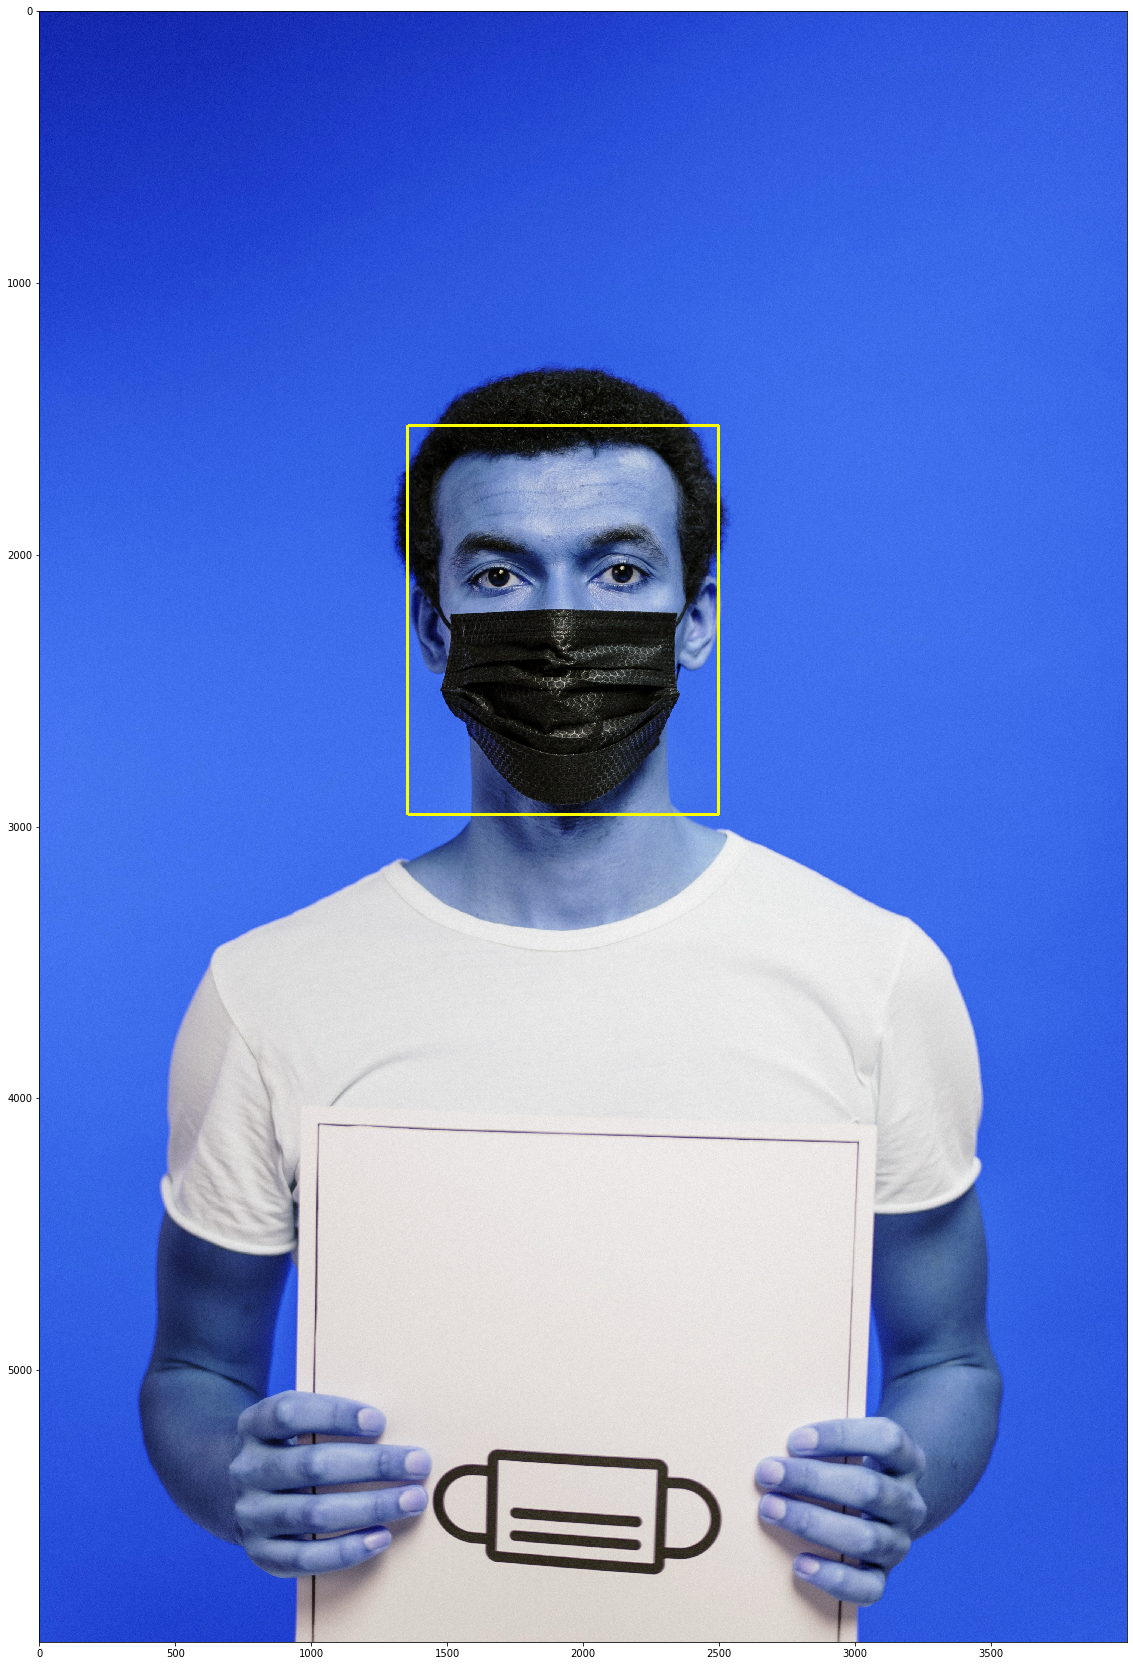

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,30))
import matplotlib.pyplot as plt
image=cv2.imread(comp_img_list[0])
image=cv2.rectangle(image,(1355,1526),(2498,2954),(255,255,0),10)
plt.imshow(image)

In [18]:
import cv2

In [20]:
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
import numpy as np
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
import  label_map_util
import visualization_utils as vis_util

# Define the video stream
cap = cv2.VideoCapture(0)  # Change only if you have more than one webcams



# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = "C:/Mask_detection/frozen_inference_graph_ssd.pb"

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS =  "C:/Mask_detection/label_map.pbtxt"
# Number of classes to detect
NUM_CLASSES = 2




# Load a (frozen) Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


# Loading label map
# Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'without_mask'}, 2: {'id': 2, 'name': 'with_mask'}}


In [21]:
# Helper code
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)


# Detection
with detection_graph.as_default():
    with tf.compat.v1.Session(graph=detection_graph) as sess:
        while True:
            # Read frame from camera
            ret, image_np = cap.read()
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Extract image tensor
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Extract detection boxes
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Extract detection scores
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            # Extract detection classes
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
           # print(classes)
            # Extract number of detectionsd
            num_detections = detection_graph.get_tensor_by_name(
                'num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
#             print(boxes, scores, classes, num_detections)
#             print(classes)
#             print(scores)
# #             break
#             break
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)

            # Display output
            #cv2.imshow('object detection', cv2.resize(image_np, (800, 600)))
            cv2.imshow('object detection', image_np)
            if cv2.waitKey(25) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break